In [1]:
#credit card fraud analysis

In [2]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import auc, make_scorer, precision_recall_curve
from numpy import std, mean

In [3]:
df = read_csv(r"C:\Users\USER\Desktop\datasets\creditcard.csv", header=None)

In [4]:
df.shape

(284807, 31)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#skewed nature of the dataset

In [7]:
target = df.iloc[:,-1]
print(df.shape)
for i,j in zip(target.value_counts().index,target.value_counts().values):
    print("class {} has {} entries representing {:.3%}".format(i,j,j/len(target)))

(284807, 31)
class 0 has 284315 entries representing 99.827%
class 1 has 492 entries representing 0.173%


In [8]:
#histogram of input variables 
#disabling axis label to avoid cluttering

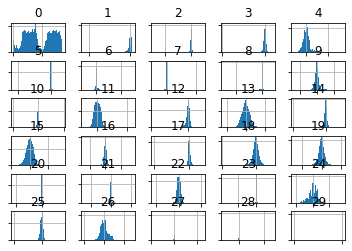

In [9]:
ax=df.iloc[:,:-1].hist(bins=100)
for axis in ax.ravel():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

In [10]:
#Amount variable doesn't appear seems insignificant 

In [11]:
df[29].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: 29, dtype: float64

In [12]:
#the mean and max appear hugely different probably an outlier

In [13]:
#function to load the dataset

In [14]:
def load_dataset(full_path):
    data=read_csv(full_path, header=None)
    data= data.values
    X,y = data[:,:-1], data[:,-1]
    return X,y

In [15]:
#caculate the precision-recall area under curve

In [16]:
def pr_auc(y_true, probas_pred):
    p,r, _ =precision_recall_curve(y_true, probas_pred)
    return auc(r,p)

In [17]:
#evaluate model

In [18]:
def evaluate_model(X,y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metric = make_scorer(pr_auc, needs_proba=True)
    scores = cross_val_score(model,X,y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

In [19]:
full_path = r"C:\Users\USER\Desktop\datasets\creditcard.csv"

In [20]:
X, y = load_dataset(full_path)

In [21]:
#dummy class

In [22]:
model = DummyClassifier(strategy='constant', constant=1)

In [23]:
scores = evaluate_model(X,y,model)

In [24]:
print("Mean PR AUC :%.3f and (:%.3f)" %(mean(scores), std(scores)))

Mean PR AUC :0.501 and (:0.000)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
#define models to test

In [27]:
def get_models():
    models, names = list(), list()
    #CART
    models.append(DecisionTreeClassifier())
    names.append('CART')
    #KNN define steps for pipeline
    steps = [('s',StandardScaler()),('m', KNeighborsClassifier())]
    models.append(Pipeline(steps=steps))
    names.append('KNN')
    models.append(BaggingClassifier())
    names.append('BAG')
    models.append(RandomForestClassifier())
    names.append('RF')
    models.append(ExtraTreesClassifier())
    names.append('ET')
    return models, names

In [28]:
#looping through each models and storng scores for evaluation

In [29]:
models, names = get_models()
results =list()
#evaluate the model
for i in range(len(models)):
    #evaluate the model and store results
    scores = evaluate_model(X,y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>CART 0.755 (0.042)
>KNN 0.869 (0.042)
>BAG 0.849 (0.046)
>RF 0.854 (0.046)
>ET 0.861 (0.044)


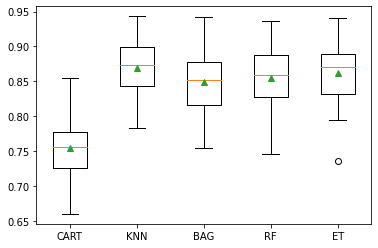

In [30]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
steps = [('sc', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps = steps)

In [33]:
knn = pipeline

In [34]:
knn.fit(X,y)

Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

In [35]:
X[:,1]

array([-1.35980713,  1.19185711, -1.35835406, ...,  1.91956501,
       -0.24044005, -0.53341252])

In [36]:
df[df[30]==1]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [37]:
data_n=X[:3].tolist()

In [38]:
data_f=[]
data_f.append(X[541].tolist())
data_f.append(X[623].tolist())
data_f.append(X[6108].tolist())

In [39]:
for row in data_n:
    yhat=pipeline.predict_proba([row])
    result = yhat[0][1]
    print('>Predicted =%.3f (expected 0)' %(result))

>Predicted =0.000 (expected 0)
>Predicted =0.000 (expected 0)
>Predicted =0.000 (expected 0)


In [40]:
for row in data_f:
    yhat=pipeline.predict_proba([row])
    result = yhat[0][1]
    print('>Predicted =%.3f (expected 1)' %(result))

>Predicted =1.000 (expected 1)
>Predicted =0.200 (expected 1)
>Predicted =0.800 (expected 1)
